In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/creditcard.csv'
df = pd.read_csv(file_path)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

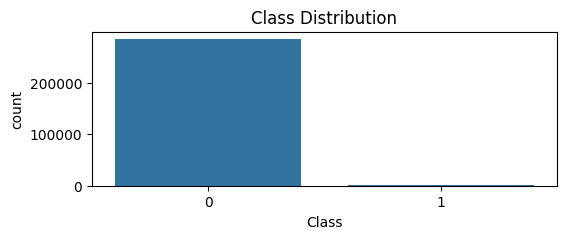

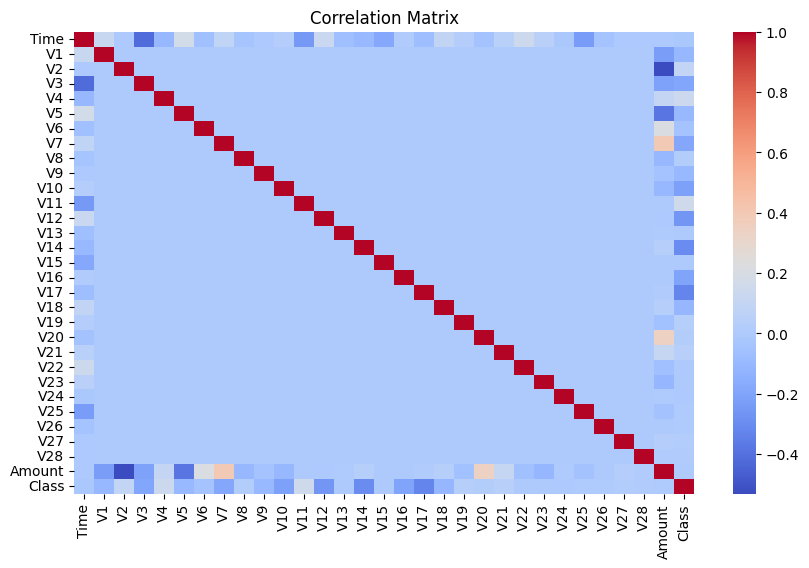

In [2]:
# Display the first few rows of the DataFrame
print(df.head())

# Display the summary statistics of the DataFrame
print(df.describe())

# Plot the distribution of the 'Class' column
plt.figure(figsize=(6, 2))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [4]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


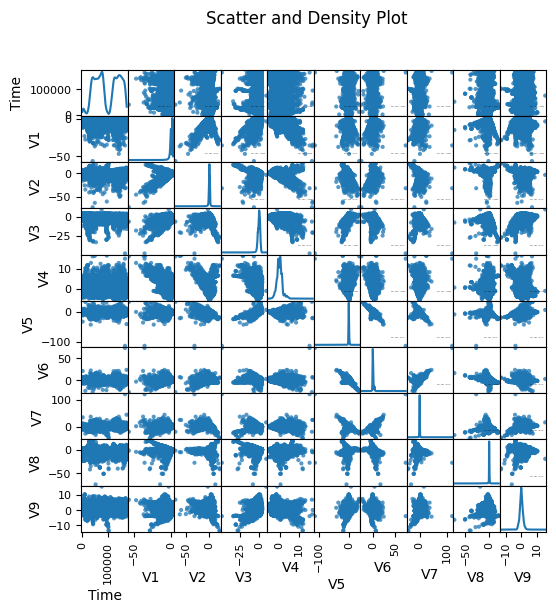

In [13]:
def plotScatterMatrix(df, plotSize, textSize):
    df = pd.read_csv(file_path)
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

#dataframe
plotScatterMatrix(df, 6, 1)


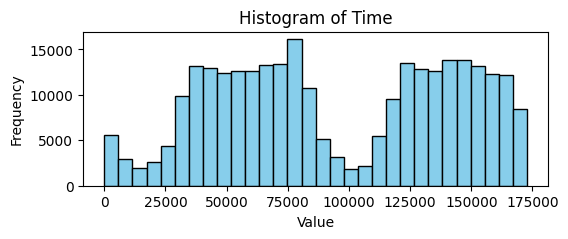

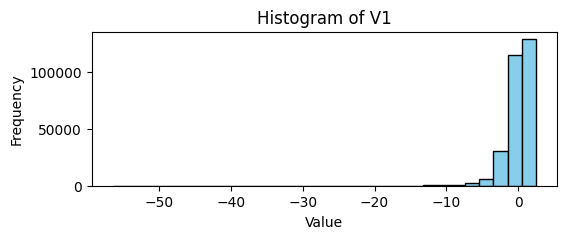

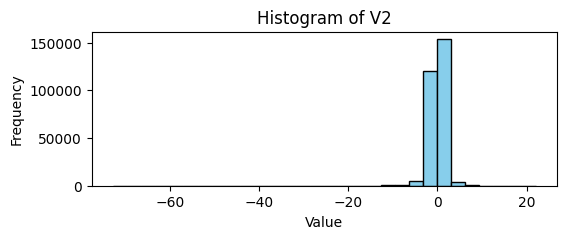

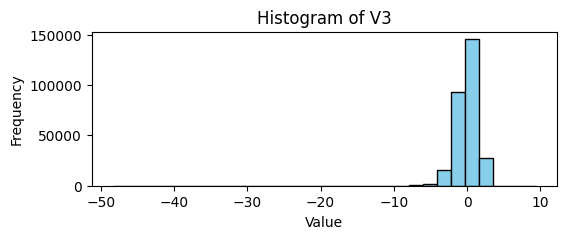

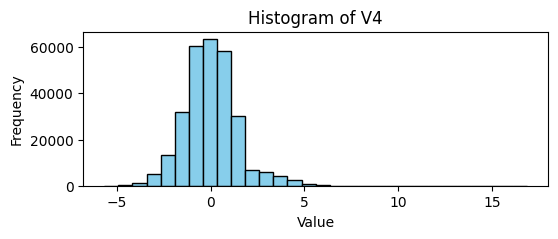

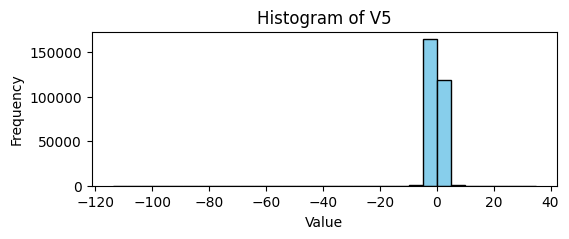

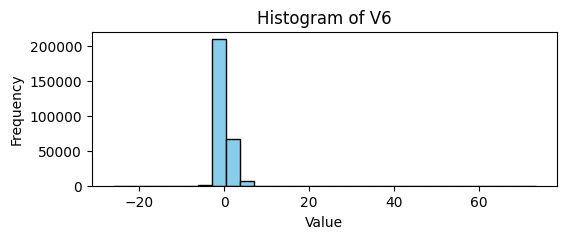

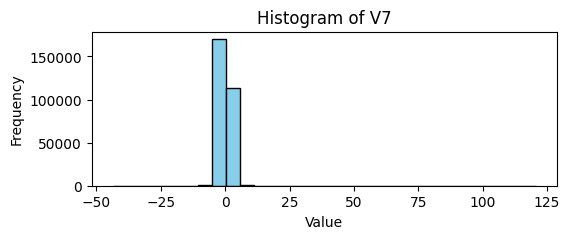

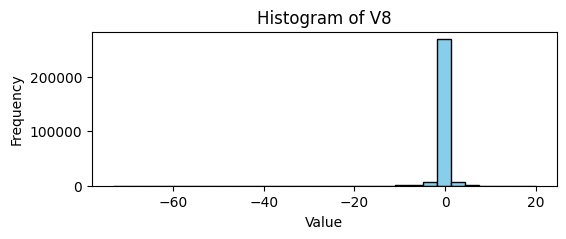

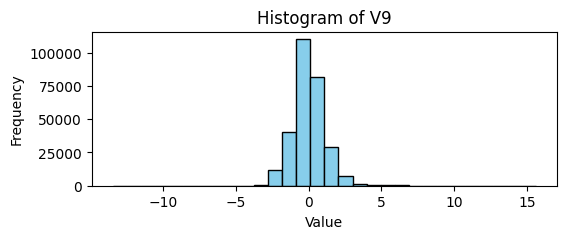

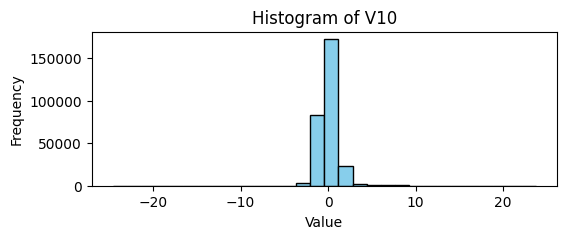

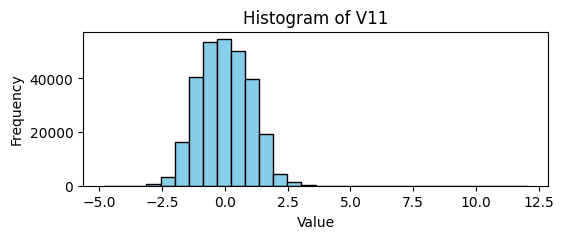

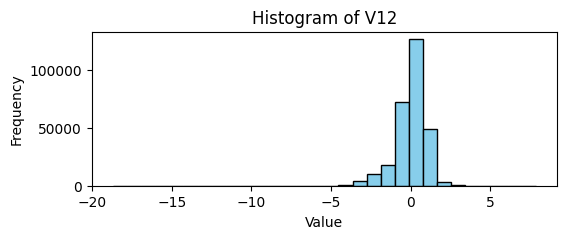

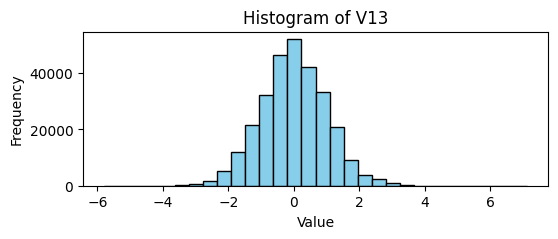

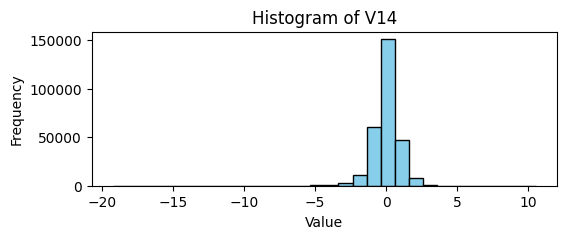

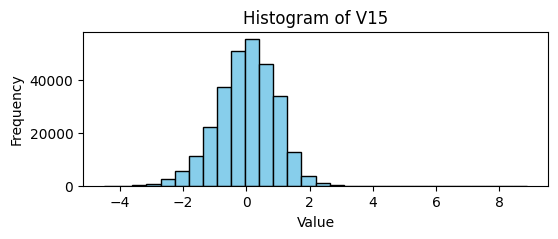

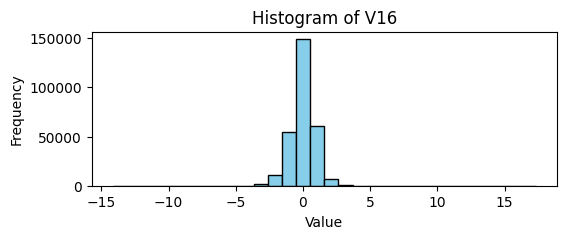

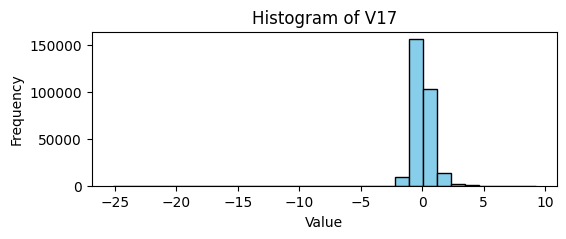

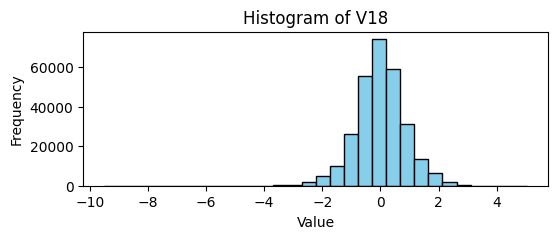

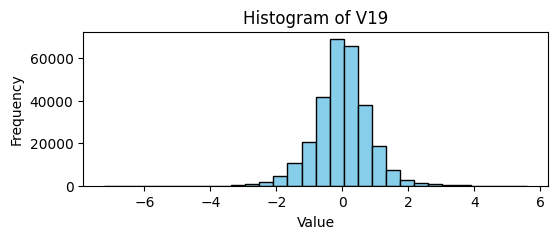

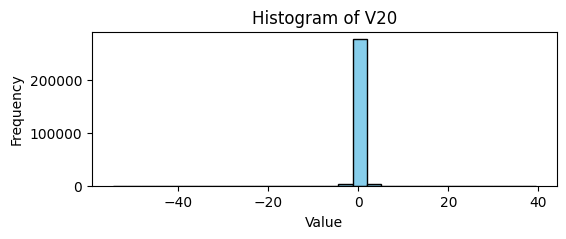

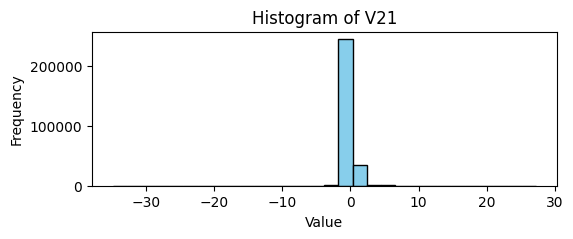

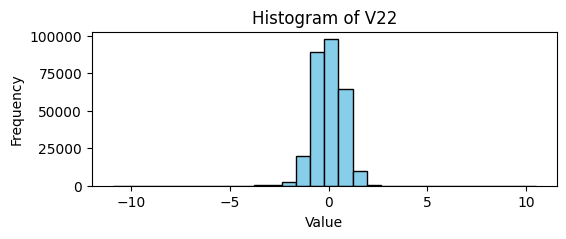

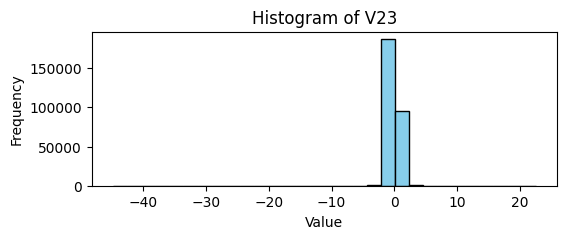

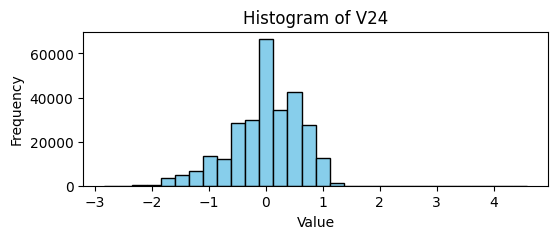

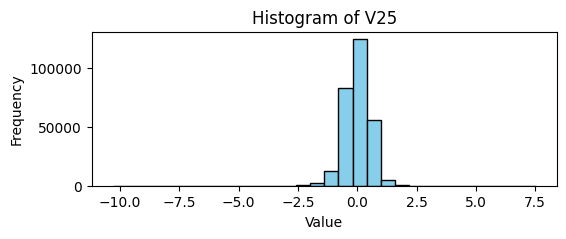

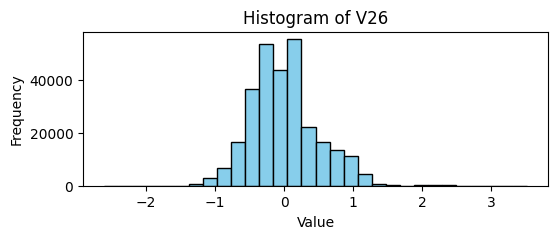

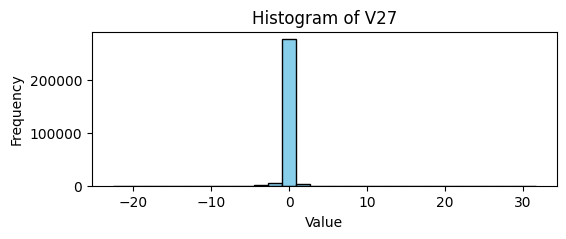

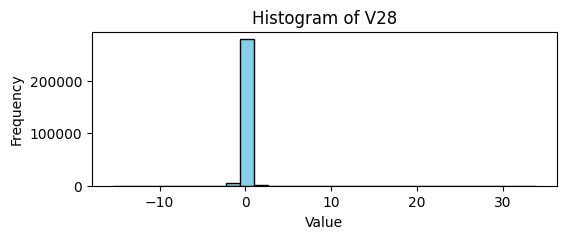

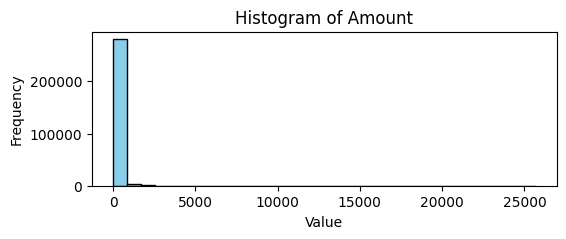

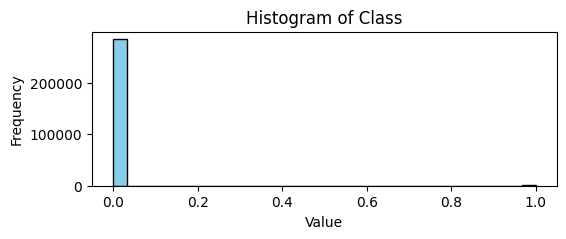

In [14]:
# Load the data from credicard.csv from drive
df = pd.read_csv(file_path)

# Loop through each column in the DataFrame
for column in df.columns:
    # Create a histogram for the column
    plt.figure(figsize=(6, 2))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [15]:
# Filter the DataFrame to include only rows where 'Class' is 1
fraud_df = df[df['Class'] == 0]

# Display the values for columns V1 to V28
print(fraud_df.loc[:, 'V1':'V28'])

# Save the filtered DataFrame to a CSV file
fraud_df.to_csv('noFraud.csv', index=False)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V19       V20  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.40399

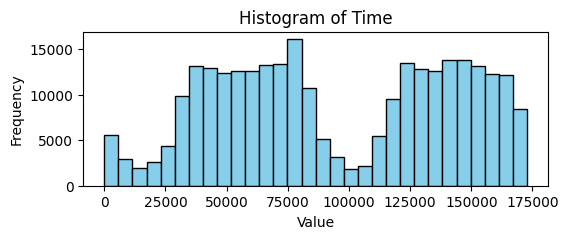

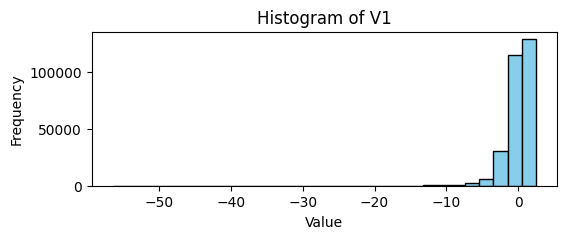

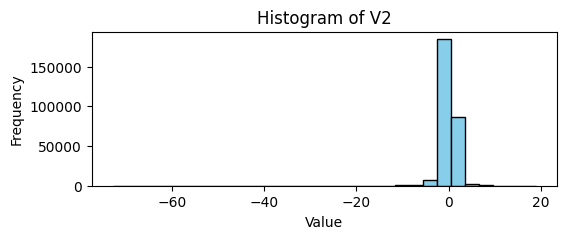

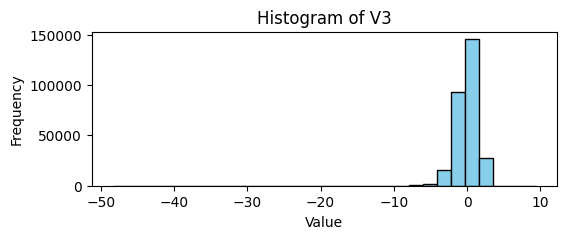

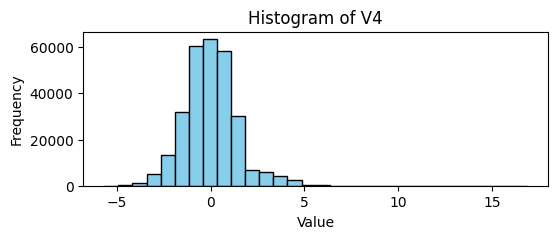

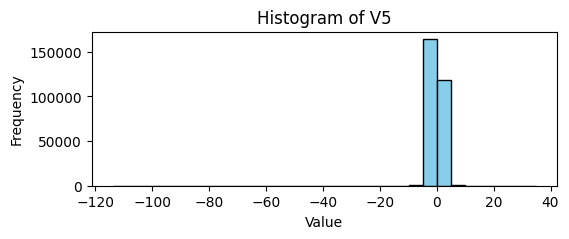

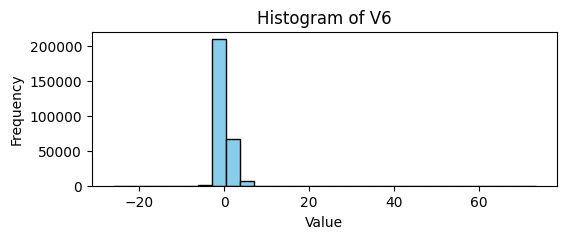

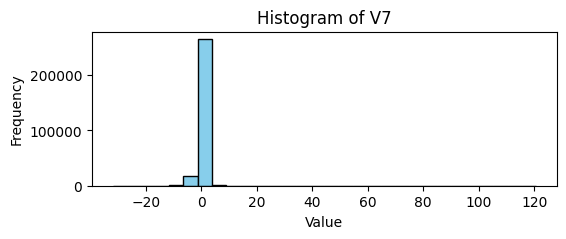

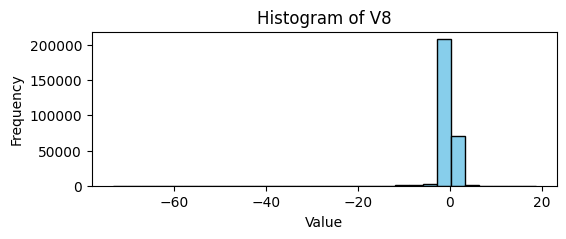

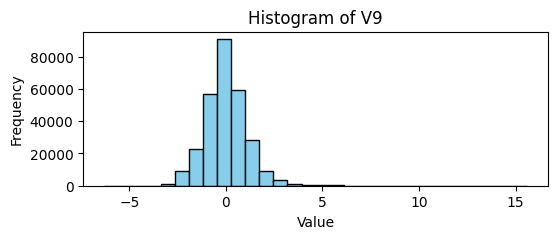

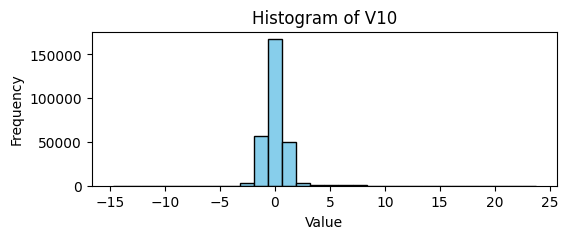

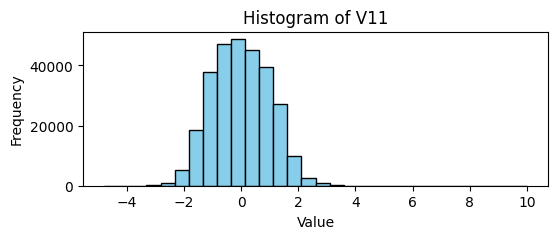

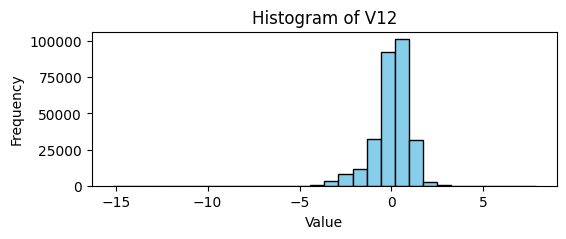

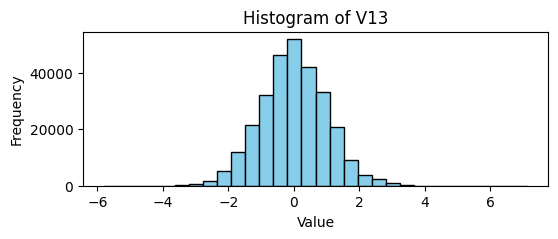

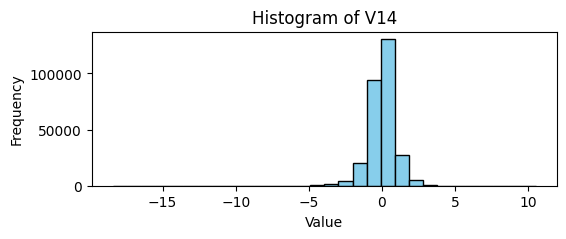

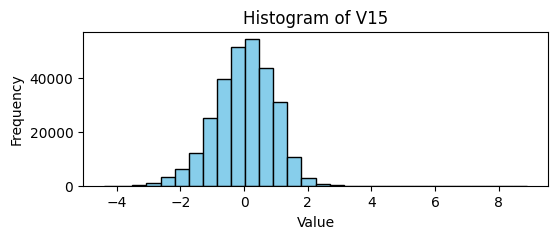

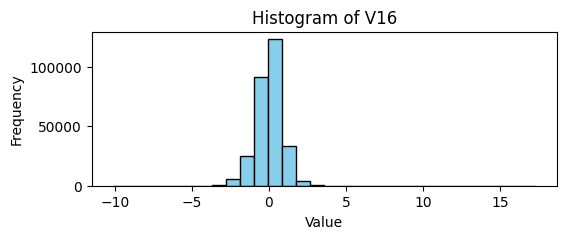

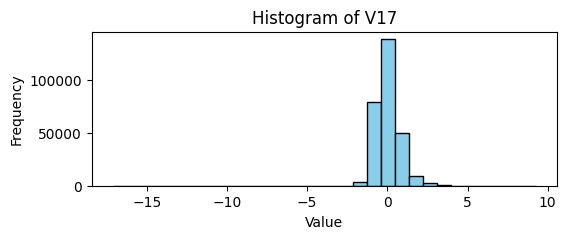

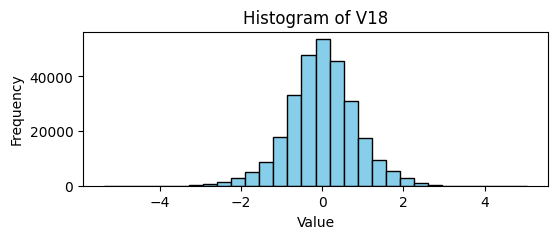

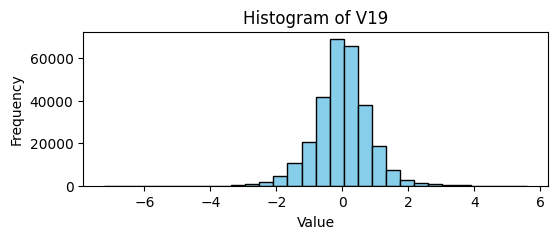

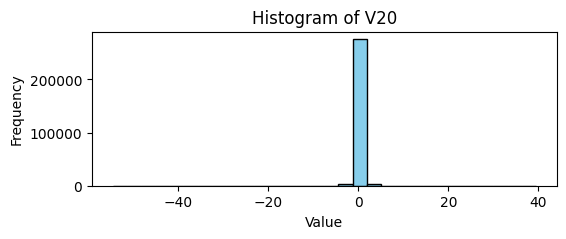

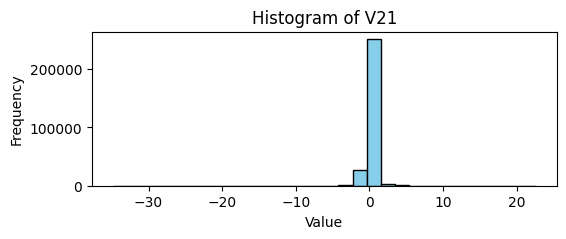

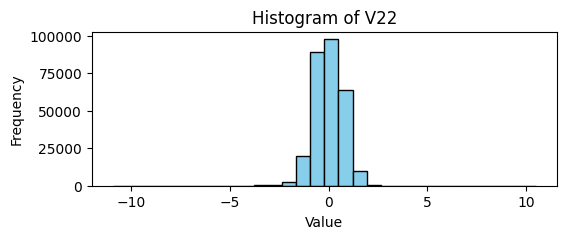

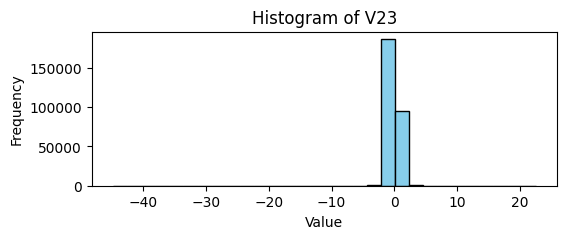

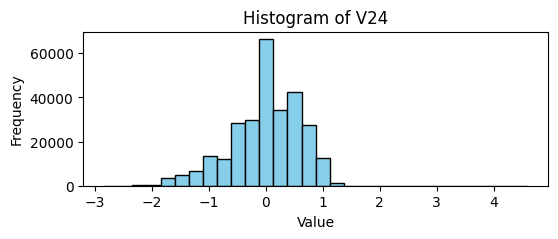

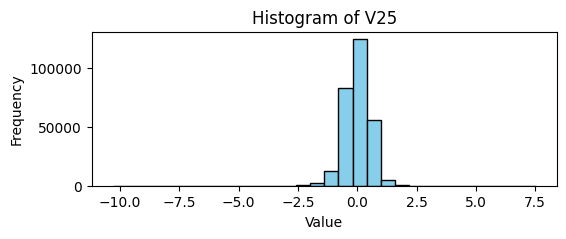

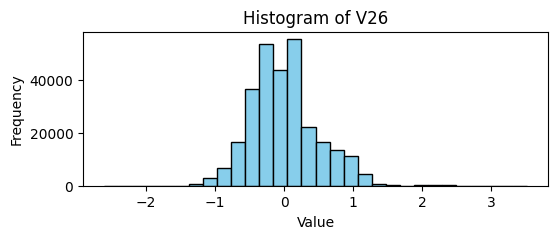

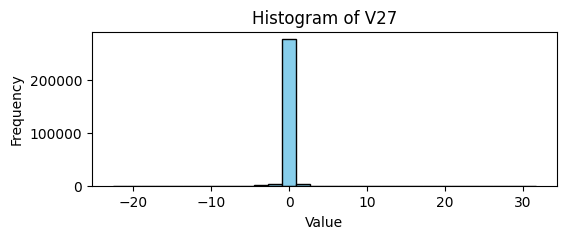

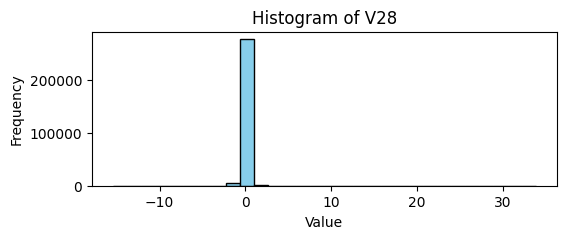

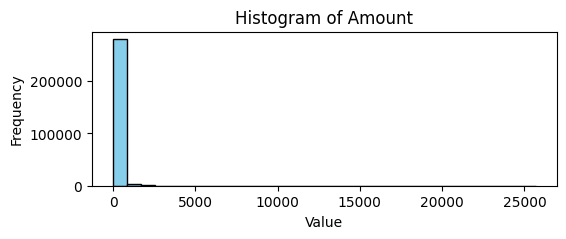

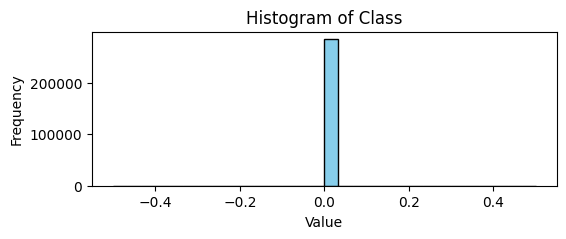

In [16]:
# Load the data
df = pd.read_csv('noFraud.csv')

# Loop through each column in the DataFrame
for column in df.columns:
    # Create a histogram for the column
    plt.figure(figsize=(6, 2))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [18]:
# Import pandas library
import pandas as pd

# Load the data from the 'creditCardClass.csv' file
df = pd.read_csv('noFraud.csv')

# Select columns V1 to V28
selected_columns = df.loc[:, 'V1':'V28']

# Initialize an empty dictionary to store the results
results = {}

# Calculate the median and spread for each column
for column in selected_columns.columns:
    # Calculate the median
    median = selected_columns[column].median()

    # Calculate the spread
    spread = selected_columns[column].max() - selected_columns[column].min()

    # Store the results in the dictionary
    results[column] = {'median': median, 'spread': spread}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Transpose the DataFrame so that each row corresponds to a column in the original data
results_df = results_df.transpose()

# Save the results to a CSV file
results_df.to_csv('summaryNoFraud.csv')

print(f'median of {column}: {median}')
print(f'Spread of {column}: {spread}')

median of V28: 0.0111990655563506
Spread of V28: 49.277891724418


In [19]:
# Load the data
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows where 'Class' is 1
fraud_df = df[df['Class'] == 1]

# Display the values for columns V1 to V28
print(fraud_df.loc[:, 'V1':'V28'])

# Save the filtered DataFrame to a CSV file
fraud_df.to_csv('fraud.csv', index=False)

              V1        V2        V3        V4        V5        V6        V7  \
541    -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623    -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
4920   -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
6108   -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6329    1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

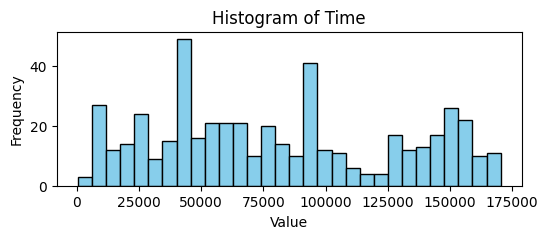

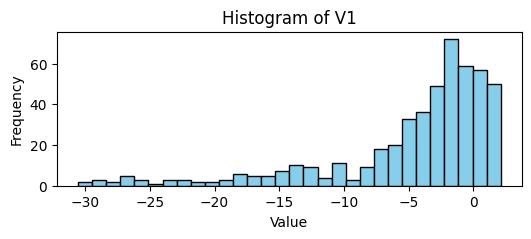

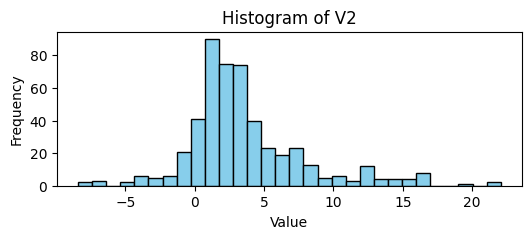

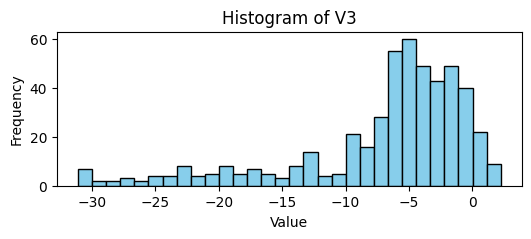

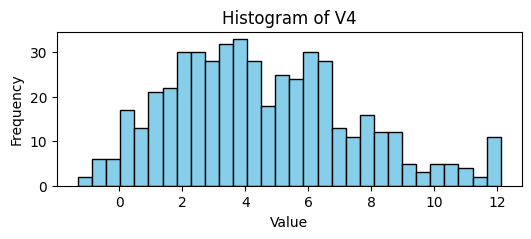

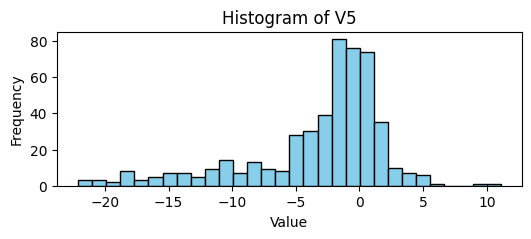

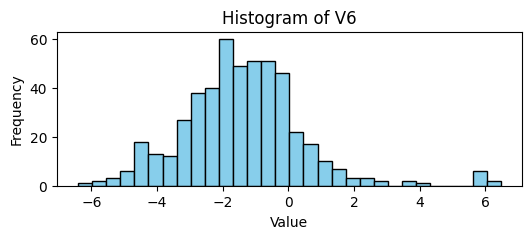

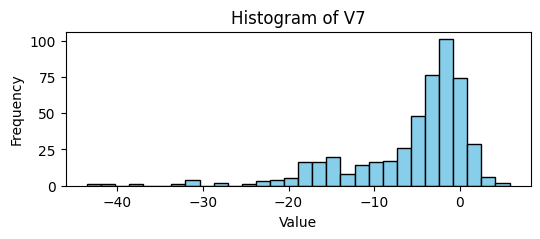

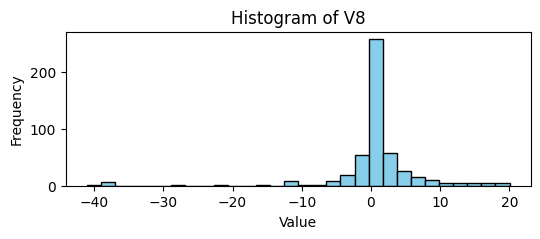

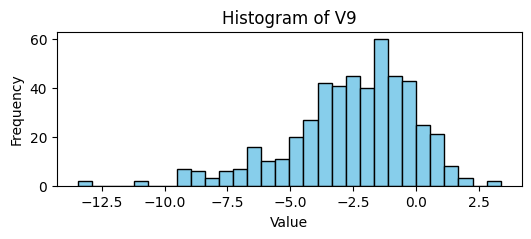

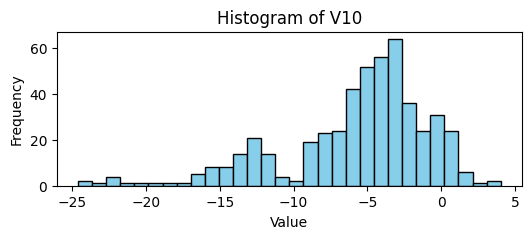

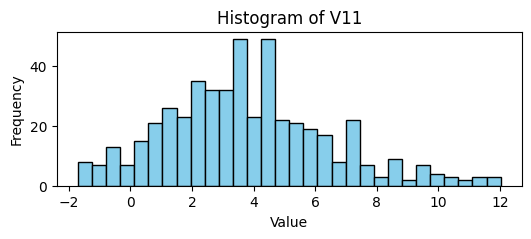

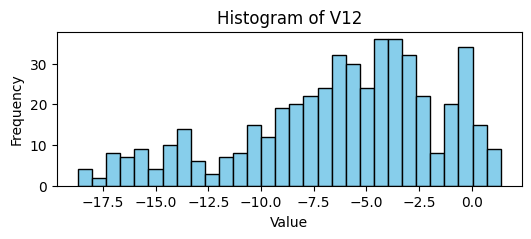

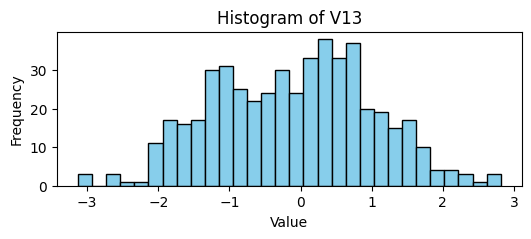

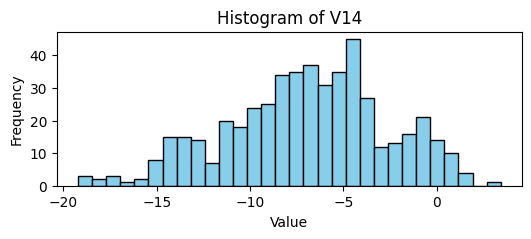

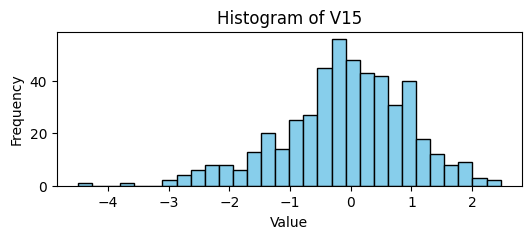

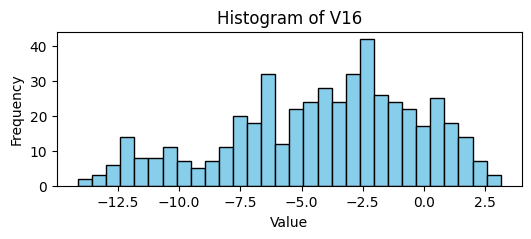

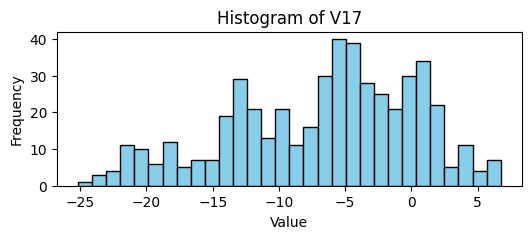

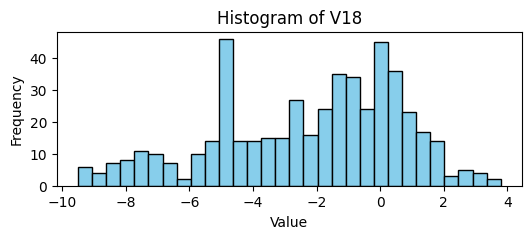

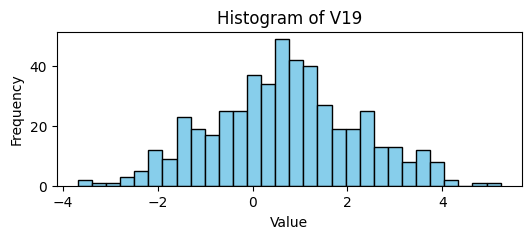

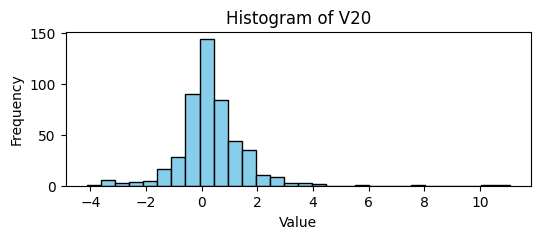

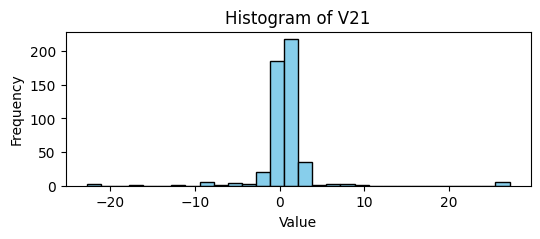

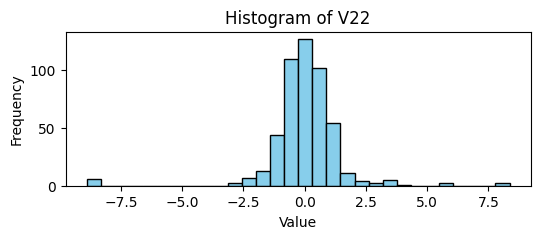

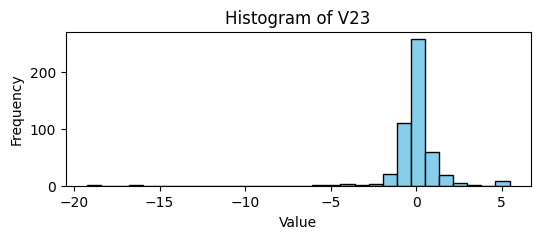

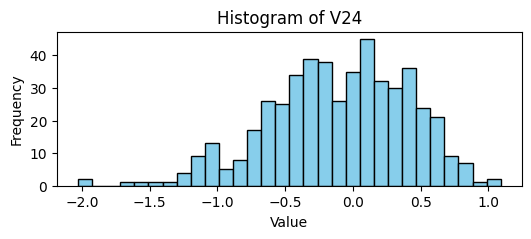

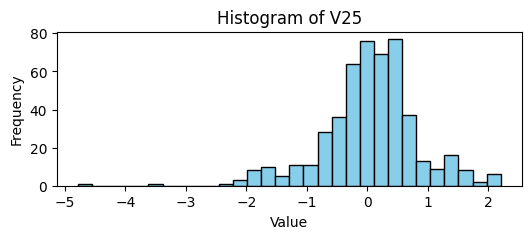

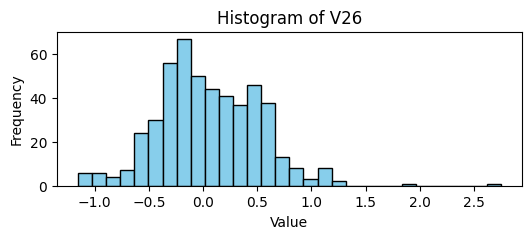

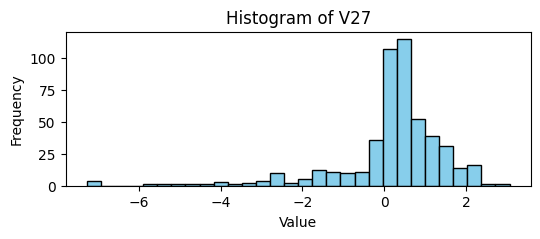

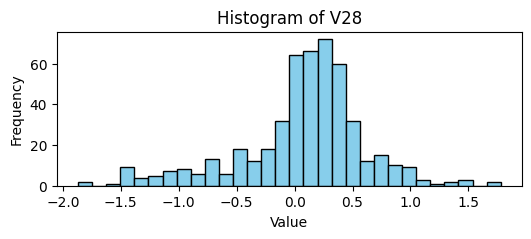

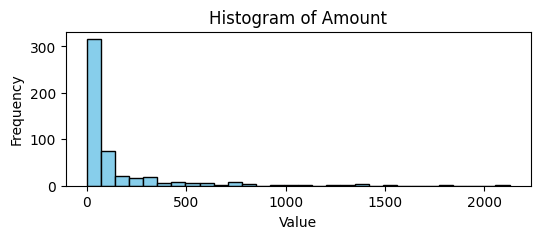

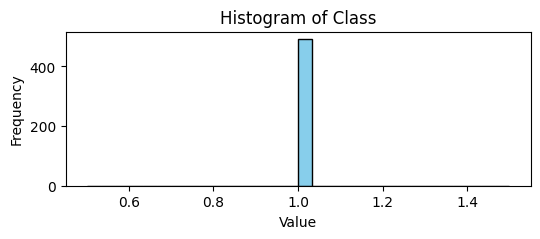

In [20]:
# Load the data
df = pd.read_csv('fraud.csv')

# Loop through each column in the DataFrame
for column in df.columns:
    # Create a histogram for the column
    plt.figure(figsize=(6, 2))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [21]:
# Load the data from the 'fraud.csv' file
df = pd.read_csv('fraud.csv')

# Select columns V1 to V28
selected_columns = df.loc[:, 'V1':'V28']

# Initialize an empty dictionary to store the results
results = {}

# Calculate the median and spread for each column
for column in selected_columns.columns:
    # Calculate the median
    median = selected_columns[column].median()

    # Calculate the spread
    spread = selected_columns[column].max() - selected_columns[column].min()

    # Store the results in the dictionary
    results[column] = {'median': median, 'spread': spread}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Transpose the DataFrame so that each row corresponds to a column in the original data
results_df = results_df.transpose()

# Save the results to a CSV file
results_df.to_csv('summaryFraud.csv')

print(f'median of {column}: {median}')
print(f'Spread of {column}: {spread}')

median of V28: 0.146344036869123
Spread of V28: 3.6486543283887602


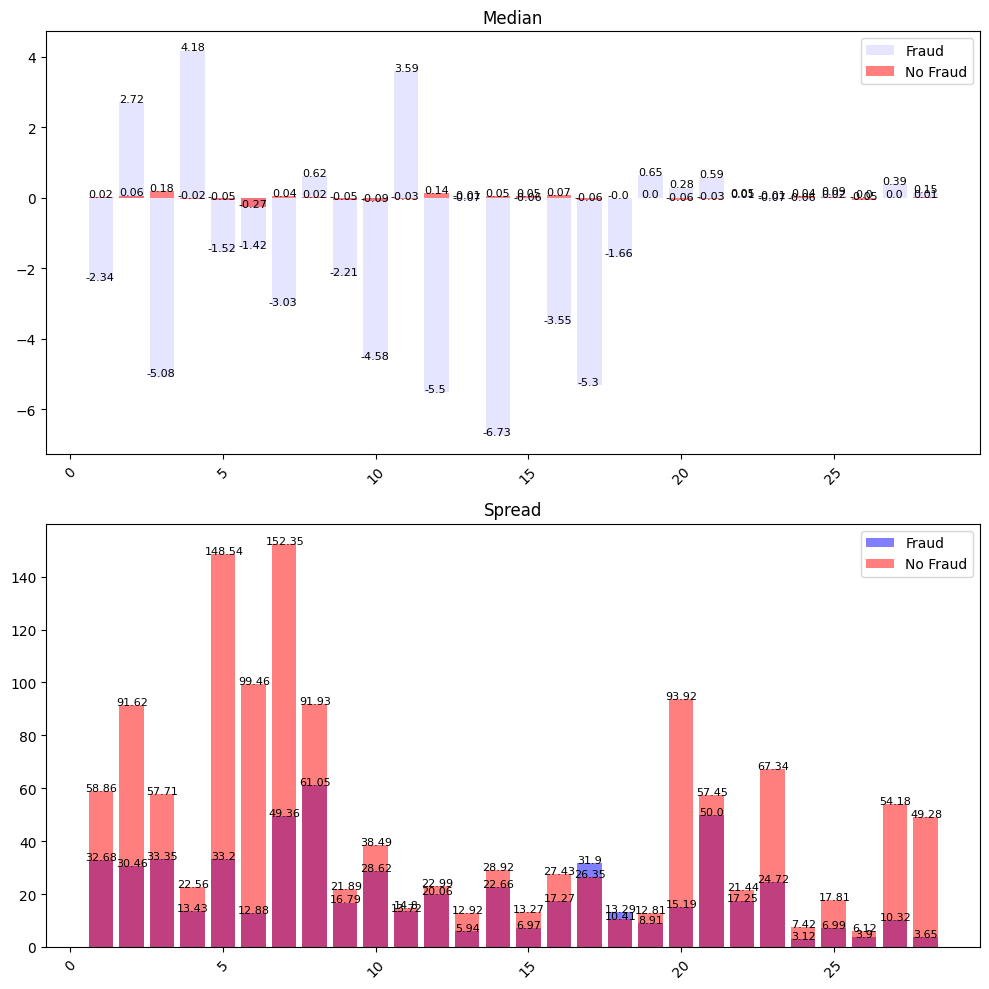

In [22]:
# Load the data from the 'summaryFraud.csv' and 'summaryNoFraud.csv' files
df1 = pd.read_csv('summaryFraud.csv')
df2 = pd.read_csv('summaryNoFraud.csv')

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 10))

# Create a bar plot for 'summaryFraud.csv'
bars1 = axs[0].bar(np.arange(len(df1.index))+1, df1['median'], color='b', alpha=0.1, label='Fraud')
bars2 = axs[0].bar(np.arange(len(df2.index))+1, df2['median'], color='r', alpha=0.5, label='No Fraud')
axs[0].set_title('Median')
axs[0].legend()

# Create a bar plot for 'summaryNoFraud.csv'
bars3 = axs[1].bar(np.arange(len(df1.index))+1, df1['spread'], color='b', alpha=0.5, label='Fraud')
bars4 = axs[1].bar(np.arange(len(df2.index))+1, df2['spread'], color='r', alpha=0.5, label='No Fraud')
axs[1].set_title('Spread')
axs[1].legend()

# Function to add labels on the bars
def add_labels(ax, bars1, bars2):
    for bars in [bars1, bars2]:
        for i, bar in enumerate(bars):
            yval = bar.get_height()
            # Adjust the position of the text based on its width (length)
            position = bar.get_x() + bar.get_width()/2 - 0.1 * len(str(round(yval, 2)))
            ax.text(position, yval + 0.01, round(yval, 2), fontsize=8)

# Add labels on the bars
add_labels(axs[0], bars1, bars2)
add_labels(axs[1], bars3, bars4)

# Rotate x-axis labels for better visibility
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

# Adjust the layout for better visibility
plt.tight_layout()

# Display the plot
plt.show()


In [23]:
# Load the data from the 'summary.csv' and 'summaryN.csv' files
df1 = pd.read_csv('summaryFraud.csv', index_col=0)
df2 = pd.read_csv('summaryNoFraud.csv', index_col=0)

# Calculate the absolute differences between the 'median' and 'spread' values
df_diff = abs(df1 - df2)

# Identify the top 10 variables for which the difference between the 'median' values is the largest
top_10_median_diff_vars = df_diff['median'].nlargest(10).index.tolist()

# Identify the top 10 variables for which the difference between the 'spread' values is the smallest
top_10_min_spread_diff_vars = df_diff['spread'].nsmallest(10).index.tolist()

# Print the results
print(f"The top 10 variables with the largest difference in 'median' values are: {top_10_median_diff_vars}")
print(f"The top 10 variables with the smallest difference in 'spread' values are: {top_10_min_spread_diff_vars}")


The top 10 variables with the largest difference in 'median' values are: ['V14', 'V12', 'V3', 'V17', 'V10', 'V4', 'V11', 'V16', 'V7', 'V2']
The top 10 variables with the smallest difference in 'spread' values are: ['V11', 'V26', 'V18', 'V12', 'V19', 'V22', 'V24', 'V9', 'V17', 'V14']


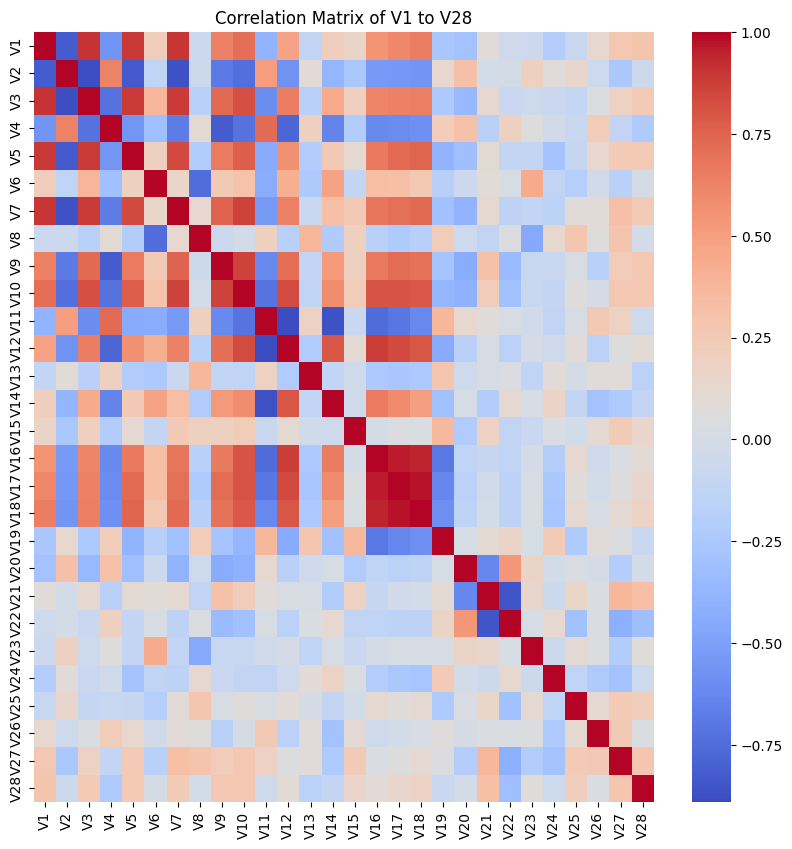

In [24]:
# Load the data
df = pd.read_csv('fraud.csv')  # replace with the path to your file

# Select columns V1 to V28
selected_columns = df.loc[:, 'V1':'V28']

# Calculate the correlation matrix
corr_matrix = selected_columns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of V1 to V28')
plt.show()

V17  V18    0.971492
V16  V17    0.960153
     V18    0.944498
V1   V3     0.907875
     V7     0.897609
     V5     0.894968
V11  V12    0.889720
V3   V5     0.883689
     V7     0.882312
V12  V16    0.881703
V2   V3     0.876904
V9   V10    0.863966
V2   V7     0.862983
V11  V14    0.862044
V7   V10    0.859823
dtype: float64


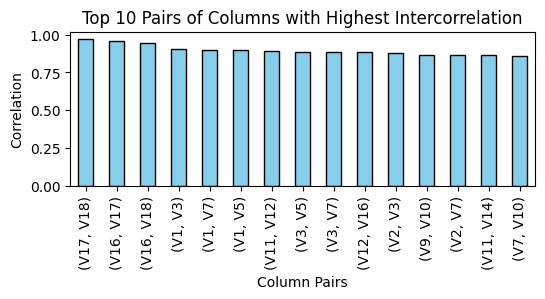

In [25]:
# Load the data
df = pd.read_csv('fraud.csv')

# Select columns V1 to V28
selected_columns = df.loc[:, 'V1':'V28']

# Calculate the correlation matrix
corr_matrix = selected_columns.corr().abs()

# Create a mask to get the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
corr_matrix_masked = corr_matrix.mask(mask)

# Create a DataFrame from the correlation matrix
corr_df = corr_matrix_masked.unstack().sort_values(ascending=False)

# Remove self-correlations (correlation of a column with itself)
corr_df = corr_df[corr_df < 1]

# Get the top 10 pairs of columns with the highest correlation
top_15_corr = corr_df[:15]

# Print the top 15 correlations
print(top_15_corr)

# Create a bar plot of the top 10 correlations
plt.figure(figsize=(6, 2))
top_15_corr.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Pairs of Columns with Highest Intercorrelation')
plt.xlabel('Column Pairs')
plt.ylabel('Correlation')
plt.show()

In [26]:
# Create a new DataFrame to store the top 15 pairs
top_15_df = pd.DataFrame()

# Add the top 15 pairs to the new DataFrame
for pair in top_15_corr.index:
    top_15_df[pair[0]] = df[pair[0]]
    top_15_df[pair[1]] = df[pair[1]]

# Save the new DataFrame to a CSV file
top_15_df.to_csv('top_15_pairs.csv', index=False)

          V17       V18       V16        V1        V3        V7        V5  \
V17  1.000000  0.971492  0.960153  0.606831  0.633947  0.703087  0.723799   
V18  0.971492  1.000000  0.944498  0.646210  0.641160  0.731406  0.745599   
V16  0.960153  0.944498  1.000000  0.555452  0.617902  0.681391  0.663324   
V1   0.606831  0.646210  0.555452  1.000000  0.907875  0.897609  0.894968   
V3   0.633947  0.641160  0.617902  0.907875  1.000000  0.882312  0.883689   
V7   0.703087  0.731406  0.681391  0.897609  0.882312  1.000000  0.839738   
V5   0.723799  0.745599  0.663324  0.894968  0.883689  0.839738  1.000000   
V11 -0.702651 -0.621476 -0.754492 -0.394137 -0.597534 -0.528746 -0.444932   
V12  0.842796  0.793753  0.881703  0.481558  0.650644  0.634749  0.565416   
V2  -0.546153 -0.562368 -0.533731 -0.819226 -0.876904 -0.862983 -0.828391   
V9   0.713887  0.697095  0.664103  0.631848  0.733208  0.754725  0.658322   
V10  0.803109  0.786508  0.806637  0.710112  0.818243  0.859823  0.764589   

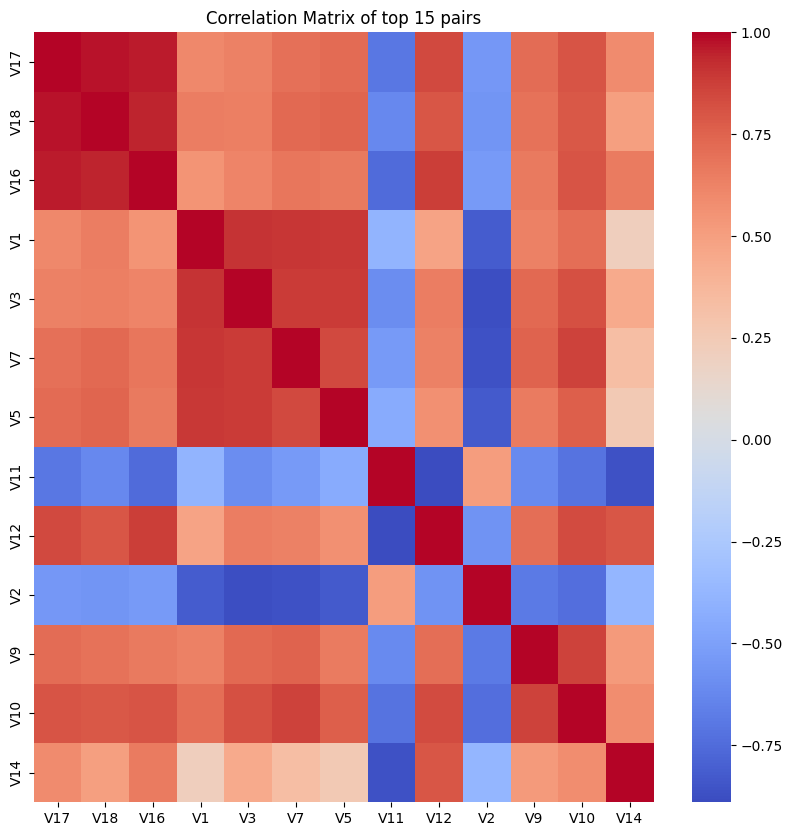

In [27]:
# Load the data from the CSV file
df = pd.read_csv('top_15_pairs.csv')

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of top 15 pairs')
plt.show()


          V17       V18       V16        V1        V3        V7        V5  \
V17  1.000000  0.971492  0.960153  0.606831  0.633947  0.703087  0.723799   
V18  0.971492  1.000000  0.944498  0.646210  0.641160  0.731406  0.745599   
V16  0.960153  0.944498  1.000000  0.555452  0.617902  0.681391  0.663324   
V1   0.606831  0.646210  0.555452  1.000000  0.907875  0.897609  0.894968   
V3   0.633947  0.641160  0.617902  0.907875  1.000000  0.882312  0.883689   
V7   0.703087  0.731406  0.681391  0.897609  0.882312  1.000000  0.839738   
V5   0.723799  0.745599  0.663324  0.894968  0.883689  0.839738  1.000000   
V12  0.842796  0.793753  0.881703  0.481558  0.650644  0.634749  0.565416   
V9   0.713887  0.697095  0.664103  0.631848  0.733208  0.754725  0.658322   
V10  0.803109  0.786508  0.806637  0.710112  0.818243  0.859823  0.764589   
V14  0.588939  0.498440  0.657529  0.211217  0.442773  0.331426  0.261163   

          V12        V9       V10       V14  
V17  0.842796  0.713887  0.80

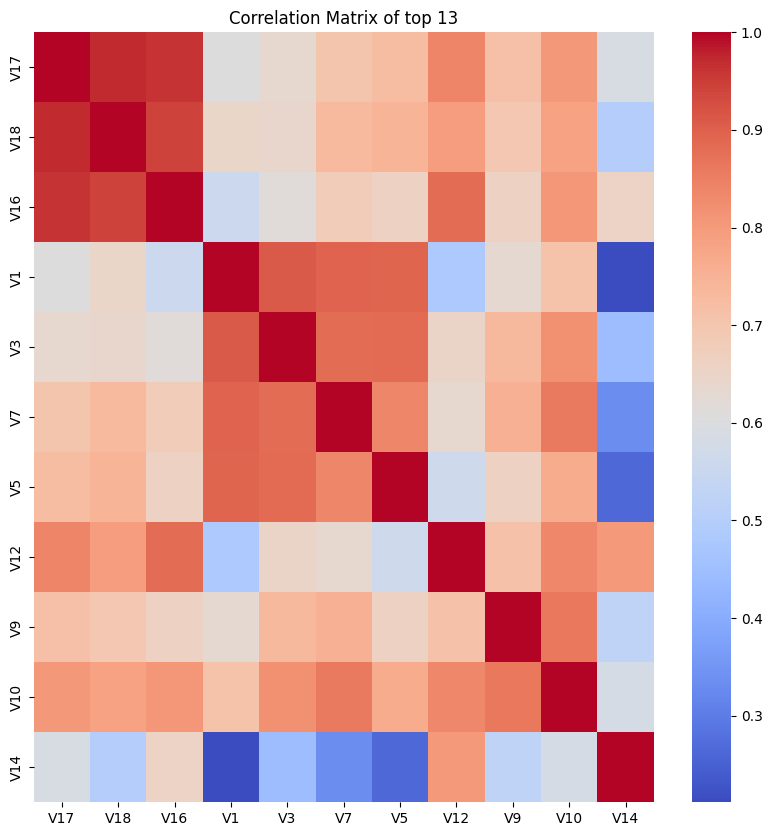

In [20]:
# Load the data from the CSV file
df = pd.read_csv('top_15_pairs.csv')

# Drop the columns 'V1' and 'V2'
df = df.drop(['V2', 'V11'], axis=1)

# Save the DataFrame back to the CSV file
df.to_csv('top_13_pairs.csv', index=False)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of top 13')
plt.show()


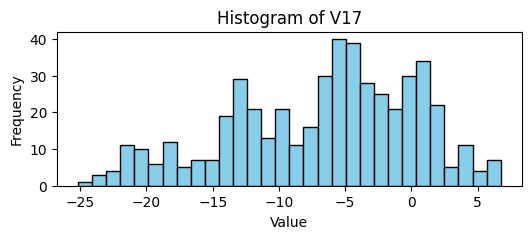

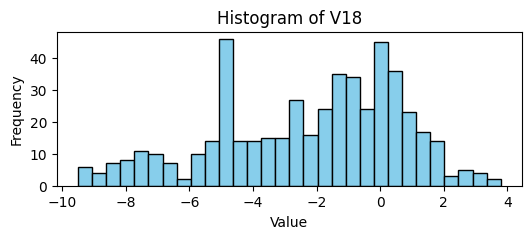

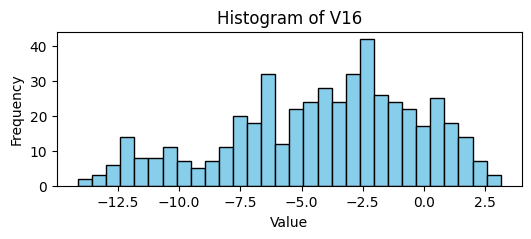

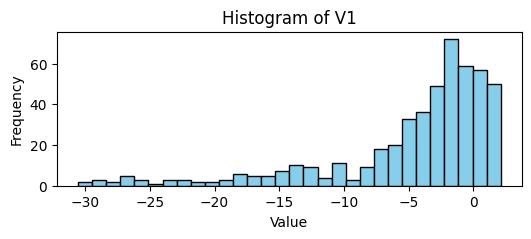

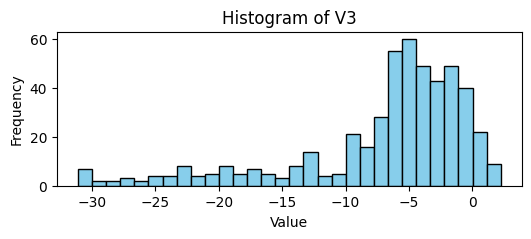

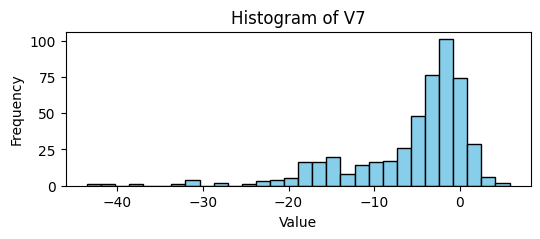

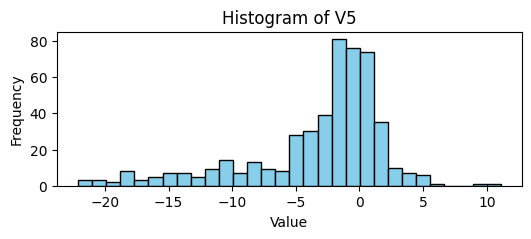

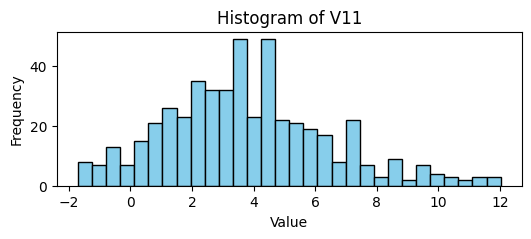

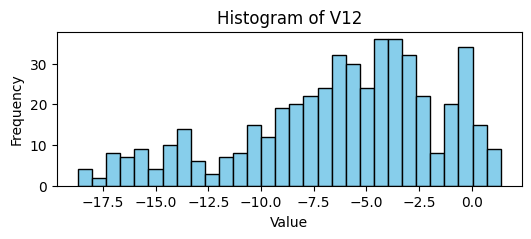

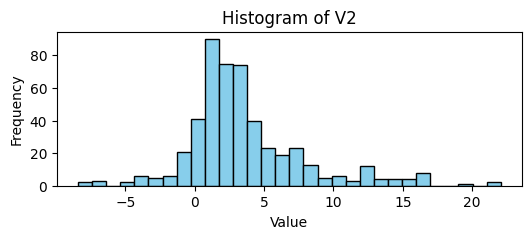

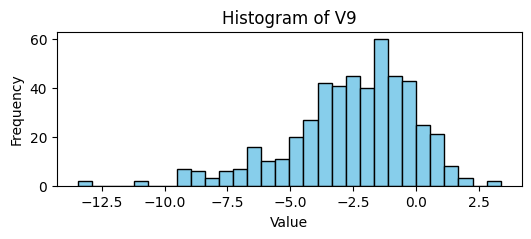

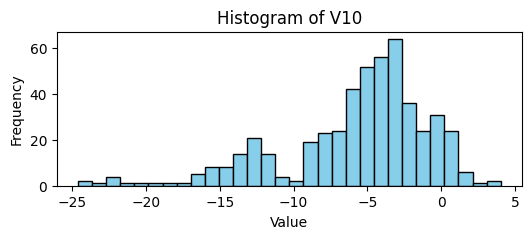

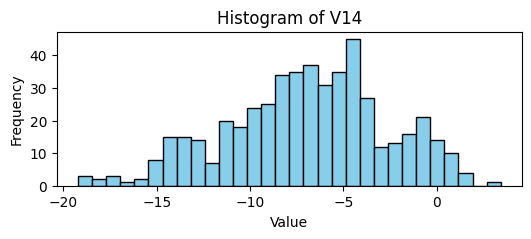

In [28]:
# Load the data
df = pd.read_csv('top_15_pairs.csv')

# Loop through each column in the DataFrame
for column in df.columns:
    # Create a histogram for the column
    plt.figure(figsize=(6, 2))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [29]:
# Load the data to keep only columns with large median diff and low spread
df = pd.read_csv(file_path)

# Specify the columns to keep
columns_to_keep = ['V17', 'V18', 'V16', 'V1', 'V3', 'V7', 'V5', 'V11', 'V12', 'V2', 'V9', 'V10', 'V14']

# Create a new DataFrame with only the specified columns
new_df = df[columns_to_keep]

# Save the new DataFrame to a CSV file
new_df.to_csv('selected_columns.csv', index=False)


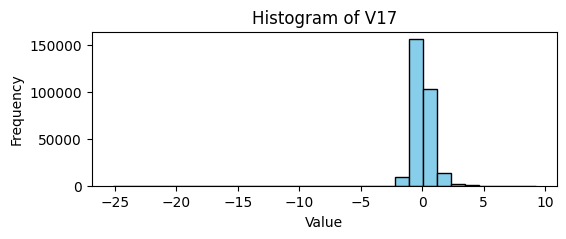

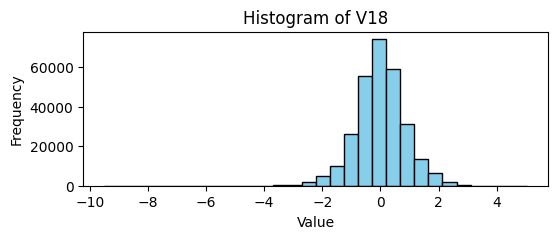

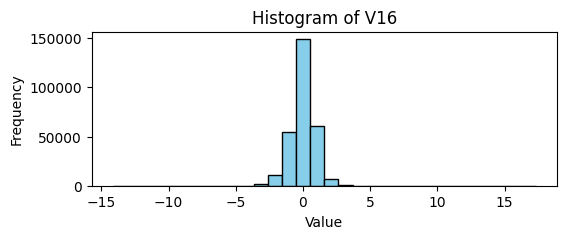

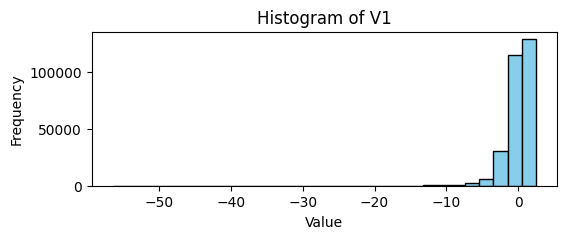

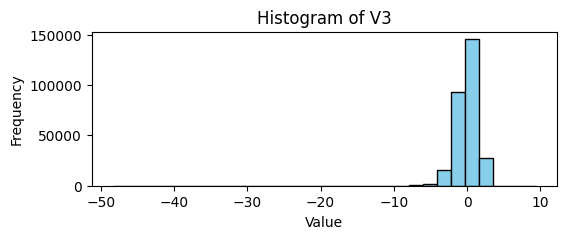

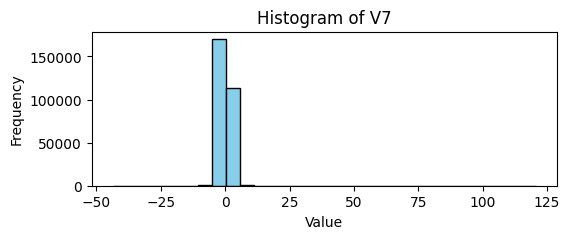

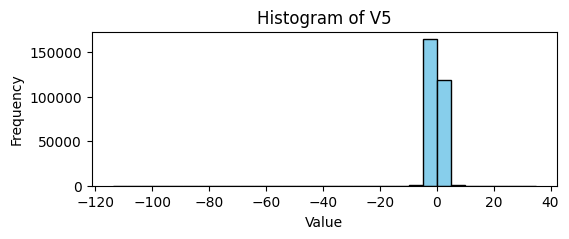

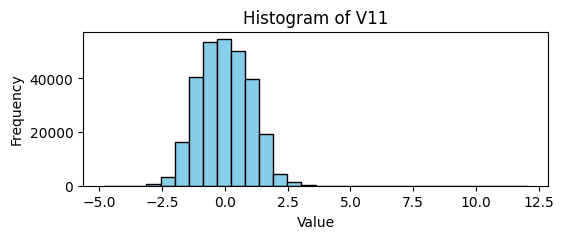

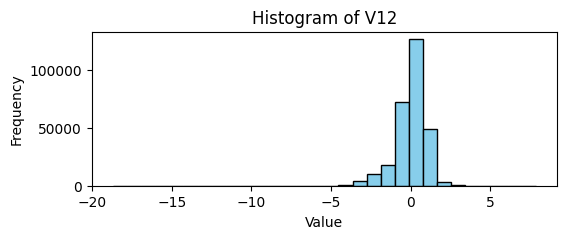

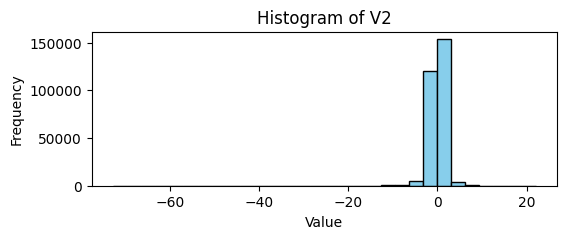

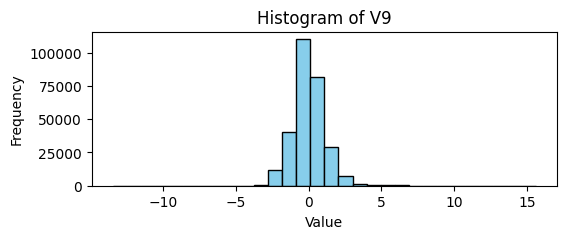

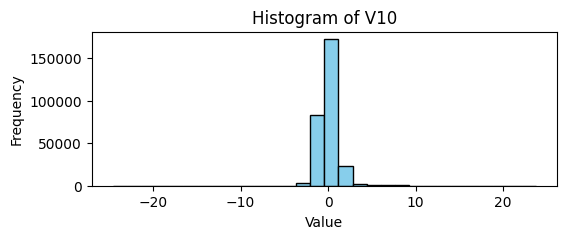

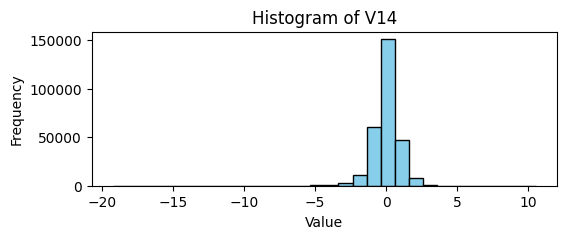

In [30]:
# Load the data
df = pd.read_csv('selected_columns.csv')

# Loop through each column in the DataFrame
for column in df.columns:
    # Create a histogram for the column
    plt.figure(figsize=(6, 2))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [24]:
# Import necessary libraries
from sklearn.metrics import auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the data from the 'creditCard.csv' file
df = pd.read_csv(file_path)

# Assume that 'Class' is the target variable and the rest are features
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_scores = clf.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate AUPRC
auprc = auc(recall, precision)

# Print the AUPRC
print(f'Area Under the Precision-Recall Curve (AUPRC): {auprc}')


Area Under the Precision-Recall Curve (AUPRC): 0.8685488292193113


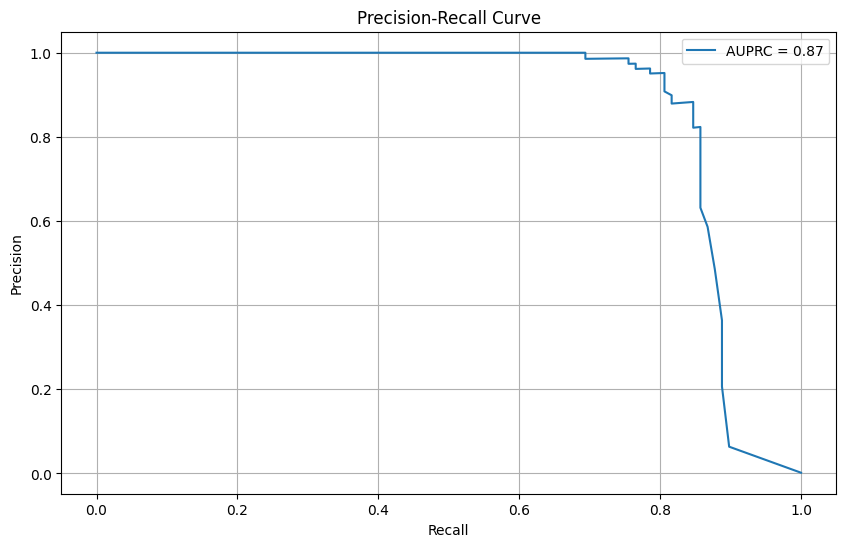

In [25]:
#Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [33]:
# Import necessary libraries
import pandas as pd

# Load the data from the 'creditCard.csv' file
df = pd.read_csv(file_path)

# Specify the columns to keep
columns_to_keep = ['V14', 'V12', 'V3', 'V17', 'V10', 'V4', 'V11', 'V16', 'V7', 'V2', 'V11', 'V26', 'V18', 'V12', 'V19', 'V22', 'V24', 'V9', 'V17', 'V14', 'Class']

# Select the specified columns
df_selected = df[columns_to_keep]

# Print the first few rows of the selected DataFrame
print(df_selected.head())

# Save the new DataFrame to a CSV file
new_df.to_csv('selected_columns.csv', index=False)


        V14       V12        V3       V17       V10        V4       V11  \
0 -0.311169 -0.617801  2.536347  0.207971  0.090794  1.378155 -0.551600   
1 -0.143772  1.065235  0.166480 -0.114805 -0.166974  0.448154  1.612727   
2 -0.165946  0.066084  1.773209  1.109969  0.207643  0.379780  0.624501   
3 -0.287924  0.178228  1.792993 -0.684093 -0.054952 -0.863291 -0.226487   
4 -1.119670  0.538196  1.548718 -0.237033  0.753074  0.403034 -0.822843   

        V16        V7        V2  ...       V26       V18       V12       V19  \
0 -0.470401  0.239599 -0.072781  ... -0.189115  0.025791 -0.617801  0.403993   
1  0.463917 -0.078803  0.266151  ...  0.125895 -0.183361  1.065235 -0.145783   
2 -2.890083  0.791461 -1.340163  ... -0.139097 -0.121359  0.066084 -2.261857   
3 -1.059647  0.237609 -0.185226  ... -0.221929  1.965775  0.178228 -1.232622   
4 -0.451449  0.592941  0.877737  ...  0.502292 -0.038195  0.538196  0.803487   

        V22       V24        V9       V17       V14  Class  
0  0.27

In [34]:
# Import necessary libraries
from sklearn.metrics import auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the data from the 'creditCard.csv' file
df = df_selected

# Assume that 'Class' is the target variable and the rest are features
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_scores = clf.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate AUPRC
auprc = auc(recall, precision)

# Print the AUPRC
print(f'Area Under the Precision-Recall Curve (AUPRC): {auprc}')


Area Under the Precision-Recall Curve (AUPRC): 0.8663094005961312


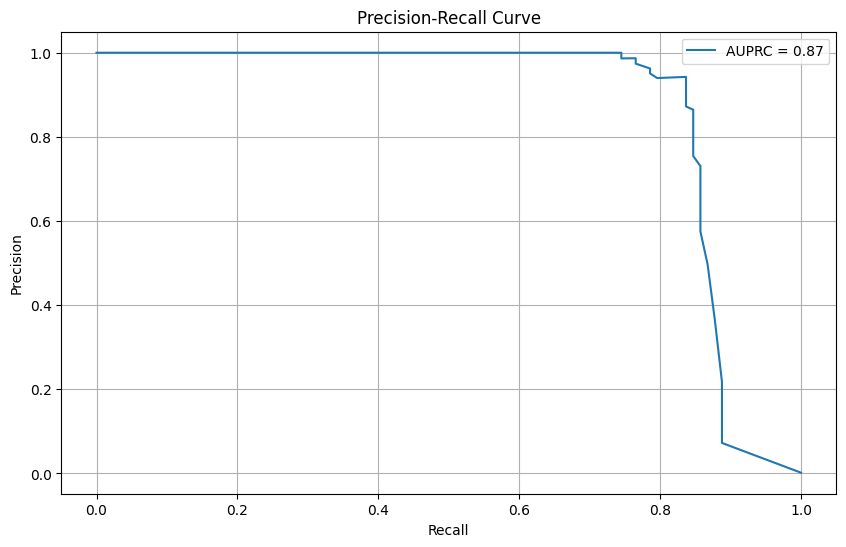

In [35]:
#Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()